## Prerequisites

Octave Tutorial 1

# 1. Recap

In Octave Tutorial 1, you learned about carrying out **computations** with numbers stored in **variables**. We hope you saw the advantage of using Octave for **repeated computations** since you can adjust the variables' values and re-run the code as many times as you need. In this tutorial, we'll learn about how you can place your repeated computations **in your own functions**.

# 2. A function is a repeatable segment of code

In mathematics, a **function** is relationship or set of instructions that maps one value onto another. If $f(x) = x^2$, then we can say that $f$ maps the **input value** $x$ onto an **output value** $x^2$. We can even make a function of multiple inputs, like the magnitude of a position vector: $r(x,y) = \sqrt{x^2 + y^2}$. The single out $r$ is determined by two inputs $x$ and $y$.

In Octave, a function works much the same way. We can specify any number of input variables and any number of output variables. For example, in the code cell below, we set up a function to calculate $r(x,y)$ for us.

A function needs to be defined in a separate file, with the same name as the function.

Read the code cell below.

In [5]:
% Our function is defined in file PositionMagnitude.m.
% It needs to be located in the same folder as this notebook.
% Open this file to see how it works!

% Call the function with a set of inputs and save the result.
disp('calling function')
distance = PositionMagnitude(3,4) 

% Copy, paste, and modify Lines 6-7 here.




calling function
starting function

r =

     5


distance =

     5



Think of the function as a set of instructions we're telling Octave ahead of time. Then, when we **call** the function in Line 7, Octave looks for the function definition in the file with the function's name.

Run the code cell above. Describe what happens with the output.

<details>
<summary>Click here for an answer.</summary>

We see output from the code cell *and* from the function, when the function is called.
    
</details>

In the code cell above, copy and paste Lines 6-7 starting in Line 10. Modify the values inside your new call to ``PositionMagnitude``. Run the code cell.

How many times is `PositionMagnitude` called? How can you tell? What happens to the values of `x` and `y` in the function?

<details>
<summary>Click here for an answer.</summary>

`PositionMagnitude` is called twice: Once in Line 7 and once in the lines we added. I can tell because 'starting function' is printed each time. The values of `x` and `y` change based on the inputs provided.
</details>

# 3. Keeping track of variables

The input variables of a function change each time they are called, and once the function is finished, Octave forgets them. That's why we call them **local variables**, because they only exist **locally** within the function.

On the other hand, you can make a **global variable**, meaning it exists **everywhere**, and can be used inside the function.

For example, suppose we wanted to create a `Distance` function (in Distance.m) to calculate the distance between the location we specify `(x,y)` and a constant reference point of `(3,9)`. We could set up the reference coordinates as a global variable, like so:

In [11]:
global xReference
global yReference

xReference = 3
yReference = 9
disp('calling function')
distance = Distance(3,4) 




xReference =

     3


yReference =

     9

calling function
starting function

r =

     5


distance =

     5



Add one or more `disp` commands inside the function to demonstrate the the values of `xReference` and `yReference` are the same inside the function `Distance` as they are outside.

<details><summary> Click here for an answer. </summary>

In Distance.m...
    
```
% Define a function named Distance, with inputs x and y.
function r = Distance(x,y) % We set an output variable equal to the function name.
    global xReference
    global yReference
    disp('starting function')  % Notice that the lines inside the function are idented.
    disp(xReference)
    disp(yReference)
    r = ( (x-xReference).^2 + (y-yReference).^2 ).^0.5   % Here we calculate the output variable.
end                            % Exit the function

```

Calling the function prints the established values of `xReference` and `yReference`.
    
</details>

Why is it important to keep track of which variables are global and which are local?

<details><summary> Click here for an answer. </summary>

It's important to know "what's going on" inside the function. If a function isn't producing results as expected, it's worthwhile to look for the definitions of global variables.

</details>

# 4. Defining a function for our $e$ series

Let's see how a function can help us in our quest to calculate $e$ using a series expansion. We started with an expression for the series expansion for $e$ as 

\begin{equation}
e = 1 + \frac{1}{1!} + \frac{1}{2!} + \frac{1}{3!} + \frac{1}{4!} + \frac{1}{5!} + \frac{1}{6!} + \ldots
\end{equation}

To set up this computation using a function, we need to think of a generic form for each term in the series. After the 0th term, the generic form for term $a_n$ is
\begin{equation}
 a_n = \frac{1}{n!}.
\end{equation}

We can turn this into a function `Term(n)` if we calculate $n!$ and take its inverse. Read the following code cell to see how.

In [12]:
% Sum up the first 4 terms.
eEstimate = 1 + Term(1) + Term(2) + Term(3)



a =

     1


a =

    0.5000


a =

    0.1667


eEstimate =

    2.6667



Add a `disp` command to Line 6 to show you the current value of `factorial(n)` being used in the function. Run the code cell and confirm that the values of $n!$ are appropriate.

Add the next 4 terms to `eEstimate` on Line 2. Run the code cell and check on your estimate for $e$.

How is this process advantageous to how we calculated $e$ in Octave Tutorial 1?

# 5. Optional: Combining Everything We've Learned

You should complete this step only if you've completed Octave Tutorials 1-5. Otherwise, skip to Step 6. 

The code cell below uses **everything we've learned** (variables, arrays, loops, control statements, and functions) to calculate $e^{-1}$ and graph the error in this calculation versus the number of terms in the series:

\begin{equation}
e = 1 - \frac{1}{1!} + \frac{1}{2!} - \frac{1}{3!} + \frac{1}{4!} - \frac{1}{5!} + \frac{1}{6!} - \ldots
\end{equation}

Read through the code cell and add comments to explain what each line does. Add print statements and re-run the code cell as many times as you need to make sense of it in terms of the individual pieces. **If you can understand this code cell and use it, then you are in good shape!**

<details><summary> Click here for an answer. </summary>

```
from math import factorial as factorial # Import the factorial function.
import numpy as np # Import numpy for arrays.
import matplotlib.pyplot as plt # Import plotting functions.
%matplotlib inline # Display the graph in the output.

def Term(n): # Define a function for term n.
    if (n%2 == 0): # Check n for even or odd to determine whether term is added or subtracted.
        PlusOrMinus = 1 # even --> add
    else:
        PlusOrMinus = -1 # odd --> subtract
    a = PlusOrMinus / factorial(n) # Calculate this term.
    return a # Return this term's value.

nArray = range(0,11) # Set up an array of term numbers n.
error  = np.empty(11) # Set up an empty array of error values.
estimate = 0 # Start the summation at 0.
realValue = 0.36787944117 # Record the real value of e^-1.

for n in nArray: # Start looping over n. Notice that we start with n = 0 since the factorial function can handle 0 factorial!
    estimate = estimate + Term(n) # Update the estimate value by calling the function.
    error[n] = estimate-realValue # Calculate the current error in e^-1.

MyFigure, MyPlot = plt.subplots() # Set up plotting area.
MyPlot.plot(nArray,error) # Plot the values of error versus n.
print(estimate) # Print our current estimate for e^-1.
```

</details>


estimate =

     1


realValue =

    0.3679



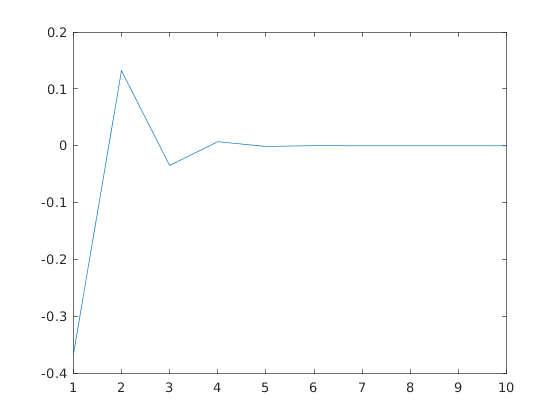

In [19]:
estimate = 1;
realValue = 0.36787944117;

for n = 1:1:10
    nArray(n) = n;
    estimate = estimate + PlusOrMinusTerm(n);
    err(n) = estimate-realValue;
end

plot(nArray,err)

# 6. Your turn

You previously developed a code cell that would calculate a gravitational potential energy value $U$ for two objects separated by a distance $r$. 

Copy and paste that code cell below. Then, modify the code cell so that your calculation of $U$ takes place inside a function `PotentialEnergy(r)`. Call your function several times for different values of $r$.